In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
df_file = pd.read_csv("For Sugar Modelling.csv")

In [3]:
df_file

,Settlement,Raw Sugar,Crude Oil,Wheat,Corn,Arabica Coffee,Gold,Soybean,Dow Jone,RBOB Gasoline,Specs Net Long,Line(QBRL=),Line(QTHB=),Line(QINR=),Line(Q.DXY),Line(QAUD=)
0,Timestamp,Trade Close,Trade Close,Trade Close,Trade Close,Trade Close,Trade Close,Trade Close,Trade Close,Trade Close,NaN,ค่าเงินบราซิล,ค่าเงินไทย,ค่าเงินอินเดีย,Dollar Index,ค่าเงินออสเตรเลีย
1,3/1/2017,20.51,52.33,414,355.75,137.4,1160.4,986.75,19881.76,1.6218,160082.0,3.2644,35.92,68.25,103.21,0.7224
2,4/1/2017,20.89,53.26,426.5,359.75,141.8,1163.8,1006.25,19942.16,1.65,198107.0,3.216,35.81,67.88,102.7,0.7283
3,5/1/2017,20.78,53.76,434.5,361.25,143.75,1179.7,1003.5,19899.29,1.64,180977.0,3.1988,35.67,67.73,101.52,0.7336
4,6/1/2017,20.75,53.99,433.5,358,142.85,1171.9,986,19963.8,1.63,176738.0,3.2239,35.72,68.09,102.22,0.7291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1094,30.43,70.91,98.301,0.6787
725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1255,30.42,71.23,98.454,0.6774
726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1805,30.42,71.49,98.288,0.6752
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1505,30.36,71.35,98.002,0.6756


In [4]:
df_file.columns

Index(['Settlement', 'Raw Sugar', 'Crude Oil', 'Wheat', 'Corn',
       'Arabica Coffee', 'Gold', 'Soybean', 'Dow Jone', 'RBOB Gasoline',
       'Specs Net Long', 'Line(QBRL=)', 'Line(QTHB=)', 'Line(QINR=)',
       'Line(Q.DXY)', 'Line(QAUD=)'],
      dtype='object')

In [5]:
df = df_file[['Settlement', 'Raw Sugar', 'Crude Oil', 'Wheat', 'Corn',
       'Arabica Coffee', 'Gold', 'Soybean', 'Dow Jone', 'RBOB Gasoline',
       'Specs Net Long']]

In [6]:
df = df[df['Settlement'].notnull()]

In [7]:
df = df.drop( index = 0)

In [8]:
df = df.reset_index( drop = True)

In [9]:
df

,Settlement,Raw Sugar,Crude Oil,Wheat,Corn,Arabica Coffee,Gold,Soybean,Dow Jone,RBOB Gasoline,Specs Net Long
0,3/1/2017,20.51,52.33,414,355.75,137.4,1160.4,986.75,19881.76,1.6218,160082.0
1,4/1/2017,20.89,53.26,426.5,359.75,141.8,1163.8,1006.25,19942.16,1.65,198107.0
2,5/1/2017,20.78,53.76,434.5,361.25,143.75,1179.7,1003.5,19899.29,1.64,180977.0
3,6/1/2017,20.75,53.99,433.5,358,142.85,1171.9,986,19963.8,1.63,176738.0
4,9/1/2017,20.42,51.96,438.5,360,144.2,1183.5,996.5,19887.38,1.57,208211.0
...,...,...,...,...,...,...,...,...,...,...,...
716,11/10/2019,12.41,54.7,419.5,397.75,93.7,1482.7,936,26816.59,1.6388,NaN
717,14/10/2019,12.52,53.59,425.75,397.75,94.85,1491.7,940.5,26787.36,1.6132,NaN
718,15/10/2019,12.59,52.81,421.25,393.25,94.45,1477.6,934,27024.8,1.6144,NaN
719,16/10/2019,12.35,53.36,425,391.75,93.55,1488,928,27001.98,1.6248,NaN


In [10]:
len(df)

721

In [11]:
df['Settlement'] =  pd.to_datetime(df['Settlement'], format='%d/%m/%Y')

In [12]:
## Profhet predict

prof_df = df[['Settlement','Raw Sugar']]
prof_df.columns = ['ds','y']

In [13]:
m = Prophet(yearly_seasonality = 12, seasonality_mode='multiplicative', seasonality_prior_scale=0.1)
m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='multiplicative')
m.add_country_holidays(country_name='US')
m.fit(prof_df)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
721,2019-10-18,12.794938,12.217732,13.341829
722,2019-10-19,9.589118,9.013337,10.194471
723,2019-10-20,9.578608,9.033634,10.168439
724,2019-10-21,12.777863,12.203987,13.301499
725,2019-10-22,12.743224,12.185594,13.306213
726,2019-10-23,12.731580,12.179408,13.291302
727,2019-10-24,12.701869,12.130747,13.271324
728,2019-10-25,12.707900,12.107643,13.266331
729,2019-10-26,9.510056,8.945524,10.097455
730,2019-10-27,9.510898,8.961614,10.101944


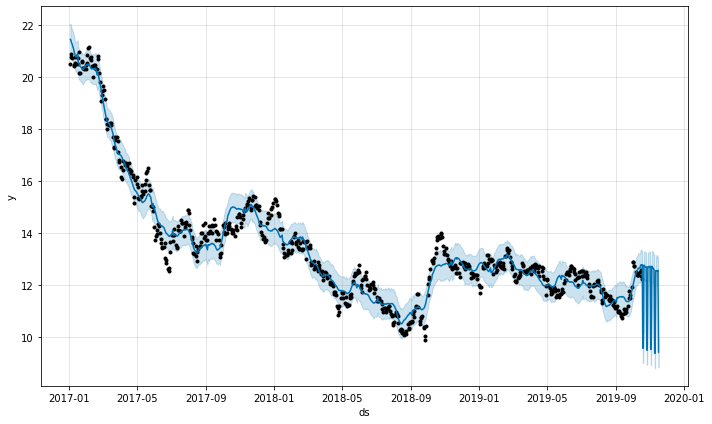

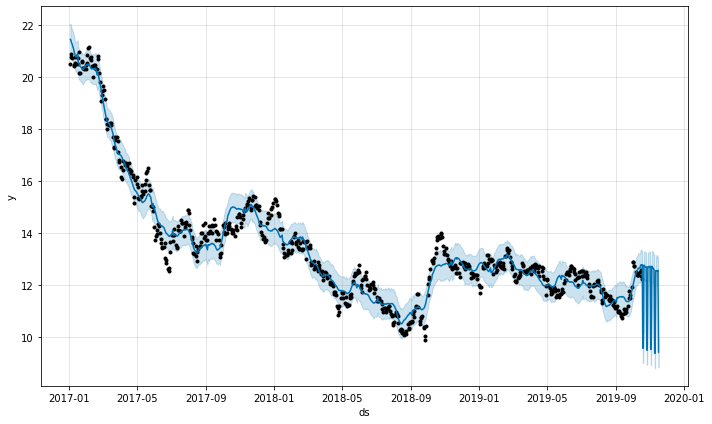

In [14]:
m.plot(forecast)

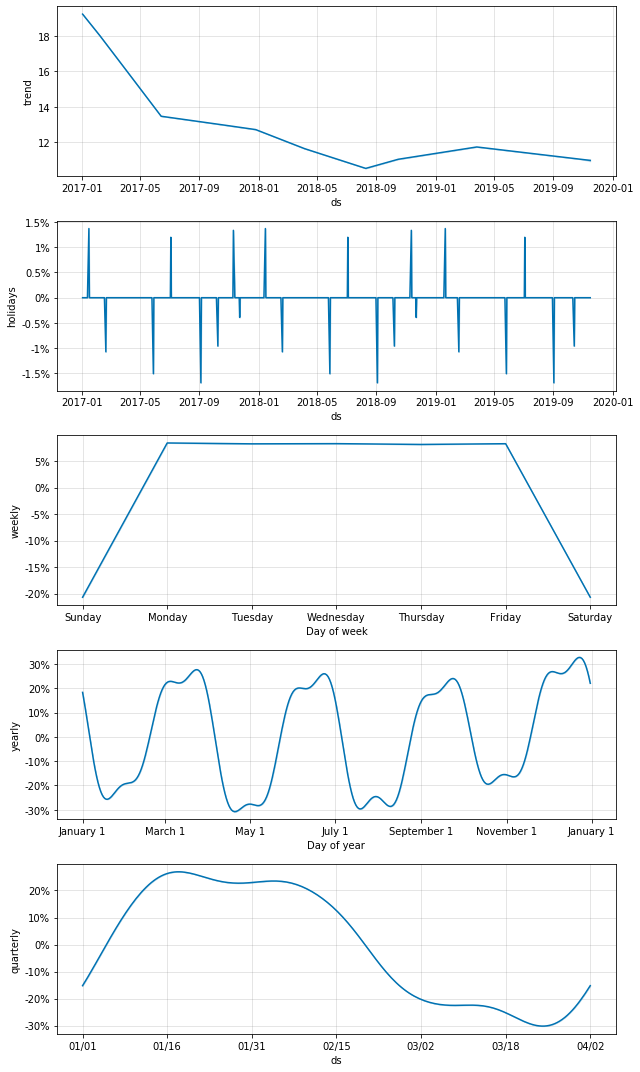

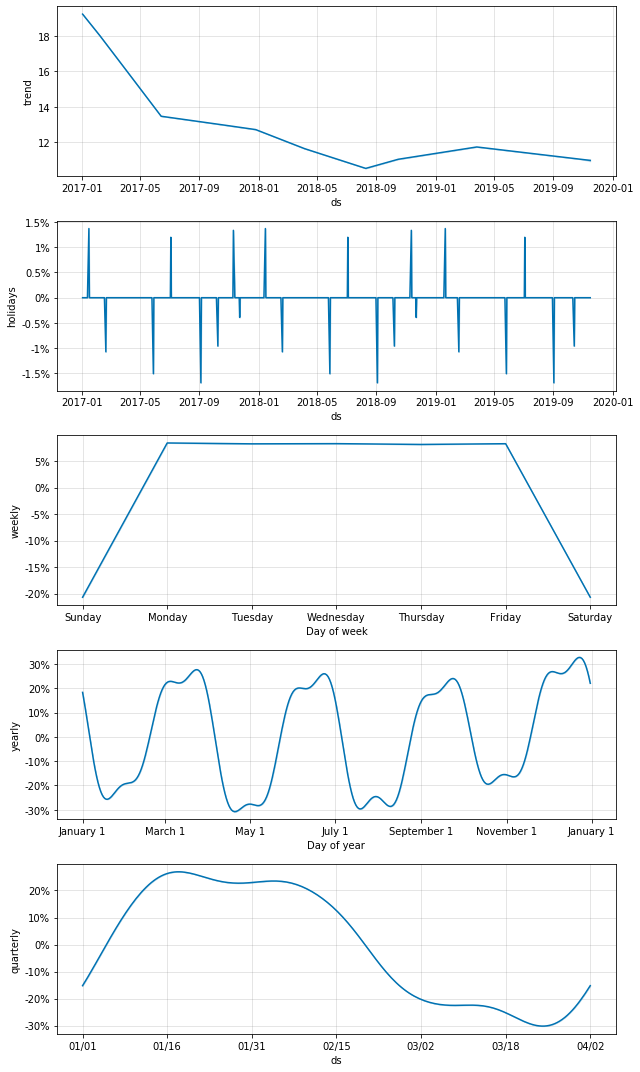

In [15]:
m.plot_components(forecast)

In [16]:
df_cv = cross_validation(m, initial='366 days', period='15 days', horizon = '15 days')
df_p = performance_metrics(df_cv)

INFO:fbprophet:Making 43 forecasts with cutoffs between 2018-01-10 00:00:00 and 2019-10-02 00:00:00


NameError: name 'performance_metrics' is not defined

In [ ]:
df_p